# Algorithms 202: Coursework 1 Task 1: Sorting

Group-ID: 15

Group members: Tencho Tenev, Emanuele Rossi, Nikolay Yotov

# Objectives

The aim of this coursework is to enhance your algorithmic skills by mastering the divide and conquer and dynamic programming strategies. You are asked to show that you can:

- implement divide and conquer solutions for given problems
- compare naive and advanced implementations of algorithms solving the same problem

This notebook *is* the coursework. It contains cells with function definitions that you will need to complete. You will submit this notebook as your coursework.

The comparisons of different algorithms involve textual descriptions and graphical plots. For graphing you will be using [matplotlib](http://matplotlib.org/index.html) to generate plots. [This tutorial](http://matplotlib.org/index.html) will be useful to go through to get you up to speed. For the textual descriptions you may wish to use [LaTeX](http://en.wikipedia.org/wiki/LaTeX) inline like $\mathcal{O}(n\log{}n)$. Double click this cell to reveal the required markup - and [see here](http://texblog.org/2014/06/24/big-o-and-related-notations-in-latex/) for useful guidance on producing common symbols used in asymptotic run time analysis.

# Preliminaries: helper functions

Here we define a collection of functions that will be useful for the rest of the coursework. You'll need to run this cell to get started.

In [1]:
# so our plots get drawn in the notebook
%matplotlib inline
from matplotlib import pyplot as plt
from random import randint
from time import clock

# a timer - runs the provided function and reports the
# run time in ms
def time_f(f):
    before = clock()
    f()
    after = clock()
    return after - before

# remember - lambdas are just one line functions

# make us a random list length (between 1 - 2000)
rand_len = lambda min_len=1, max_len=2e3: randint(min_len, max_len)

# choose a random value for a list element (between 0 1e6)
rand_int = lambda: randint(0, 1e6)

# generate a random list of random length -
# here we use a list comprehension, a very tidy
# way of transforming lists of data
rand_list = lambda min_len=1, max_len=2e3: [rand_int() 
                                 for i in range(rand_len(min_len=min_len, max_len=max_len))]

## Task 1: Sorting

In this task you are asked to implement `insertion_sort` and `merge_sort`. You need to perform an experimental analysis of their running time. Based on your analysis, you should implement a third sorting algorithm, `hybrid_sort`, which is similar to `merge_sort` but uses `insertion_sort` for the base case. The problem size for which the base case is invoked has to be inferred from the running time analysis.

### 1a. Implement `insertion_sort`

Complete the below definition for `insertion_sort`. Do not change the name of the function or it's arguments. 


Hints:

- Your sort should be in-place (i.e. it changes the input list for the caller) but you should also return the list so the function can be called as indicated below.

In [2]:
def insertion_sort(a):
    length = len(a)
    
    # Assume [0;i) is the sorted part of a and insert a[i]
    for i in range(1, len(a)):
        # Insert a[i] in the right spot going backwards from a[i-1]
        for j in range(i, 0, -1):
            if a[j] < a[j-1]:
                a[j], a[j-1] = a[j-1], a[j]
    return a

Use this test to confirm your implementation is correct.

In [3]:
x = [2, 4, 1, 3]
print(insertion_sort(x) == [1, 2, 3, 4])

True


### 1b. Implement `merge_sort`

Complete the below definition for `merge_sort`. Do not change the name of the function or it's arguments.

Hints:

- Your implementation should leave the input list unmodified for the caller
- You are free to define other functions in this cell

In [4]:
import math

def merge_sort(a):
    length = len(a)
    
    if length == 1:
        return a
    
    mid = math.floor(length / 2)
    l = a[:mid]
    r = a[mid:]
    
    l_sorted = merge_sort(l)
    r_sorted = merge_sort(r)
    
    return merge(l_sorted, r_sorted)

def merge(l, r):
    merged = []
    while l and r:
        if l[0] <= r[0]:
            merged.append(l.pop(0))
        else:
            merged.append(r.pop(0))

    # Append all of l (maybe empty)
    merged.extend(l)    
    # Append all of r (maybe empty)
    merged.extend(r)
    
    return merged

Use this test to confirm your implementation is correct.

In [5]:
x = [2, 4, 1, 3]
print(merge_sort(x) == [1, 2, 3, 4])
print(merge_sort(x))

True
[1, 2, 3, 4]


### 1c. Analyse the running time performance of `insertion_sort` and `merge_sort`

Draw graphs showing the running time performance of your `insertion_sort` and `merge_sort` for different lengths of random integers. Analyse the performance at the large scale ($n \approx 10^3$) and small scale ($n \approx 10$).

In [6]:
short_lists = [rand_list(min_len=5, max_len=30) for _ in range(10000)]

insertion_sort_times = [time_f(lambda: insertion_sort(x)) for x in short_lists]
merge_sort_times = [time_f(lambda: merge_sort(x)) for x in short_lists]
list_sizes = [len(x) for x in short_lists]

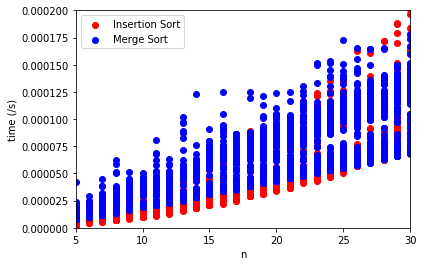

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt

insertion_result = plt.scatter(list_sizes, insertion_sort_times, c='red')
merge_result = plt.scatter(list_sizes, merge_sort_times, c='blue')
plt.xlabel('n')
plt.ylabel('time (/s)')
plt.xlim(5,30)
plt.ylim(0, 0.0002)

plt.legend((insertion_result, merge_result),
           ('Insertion Sort', 'Merge Sort'))

From the above chart we can clearly see how Insertion Sort is faster for input size up to approximately 20.

In [8]:
long_lists = [rand_list(max_len=1000) for _ in range(1000)]

insertion_sort_times = [time_f(lambda: insertion_sort(x)) for x in long_lists]
merge_sort_times = [time_f(lambda: merge_sort(x)) for x in long_lists]
list_sizes = [len(x) for x in long_lists]

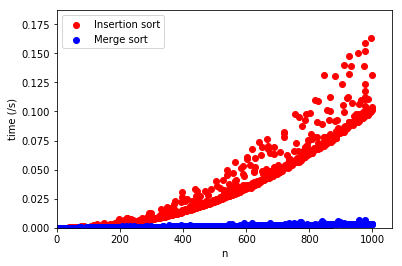

In [9]:
%matplotlib inline
from matplotlib import pyplot as plt

isort = plt.scatter(list_sizes, insertion_sort_times, c='red')
msort = plt.scatter(list_sizes, merge_sort_times, c='blue')
plt.xlabel('n')
plt.ylabel('time (/s)')
plt.xlim(0)
plt.ylim(0)

plt.legend((isort, msort),
           ('Insertion sort', 'Merge sort'))

In [10]:
very_long_lists = [rand_list(max_len=100000) for _ in range(100)]

merge_sort_times = [time_f(lambda: merge_sort(x)) for x in very_long_lists]
list_sizes = [len(x) for x in very_long_lists]

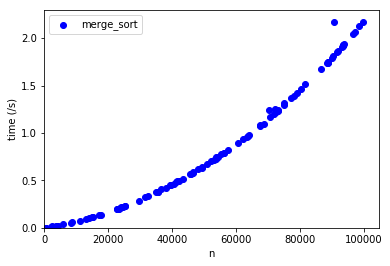

In [11]:
%matplotlib inline
from matplotlib import pyplot as plt

merge = plt.scatter(list_sizes, merge_sort_times, c='blue')
plt.xlabel('n')
plt.ylabel('time (/s)')
plt.xlim(0)
plt.ylim(0)

plt.legend((merge,),
           ('merge_sort',))

**Now discuss your findings in a few lines in the below cell:**

Our implementation of insertion sort performs slightly better than merge sort for input size up to 20. Data from sorting longer lists clearly shows that insertion sort has complexity $\mathcal{O}(n^2)$ while merge sort complexity is $\mathcal{O}(n\log{}n)$.

### 1d. Implement `hybrid_sort()`

Implement `hybrid_sort()`, a `merge_sort()` variant which uses `insertion_sort()` for the base case. The problem size for which the base case is invoked has to be inferred from your above running time analysis.

In [12]:
import math

ISORT_BASE_SIZE = 20

def hybrid_sort(a):
    length = len(a)
    
    if length <= ISORT_BASE_SIZE:
        return insertion_sort(a)
    
    mid = math.floor(length / 2)
    l = a[:mid]
    r = a[mid:]
    
    l_sorted = hybrid_sort(l)
    r_sorted = hybrid_sort(r)
    
    return merge(l_sorted, r_sorted)

def merge(l, r):
    merged = []
    while l and r:
        if l[0] <= r[0]:
            merged.append(l.pop(0))
        else:
            merged.append(r.pop(0))

    # Append all of l (maybe empty)
    merged.extend(l)    
    # Append all of r (maybe empty)
    merged.extend(r)
    
    return merged

Use this test to confirm your implementation is correct.

In [13]:
x = [2, 4, 1, 3]
print(hybrid_sort(x) == [1, 2, 3, 4])

True


### 1e. Analyse all three sorting implementations together

Draw graphs showing the running time performance of your `insertion_sort()`, `merge_sort()` and `hybrid_sort()` for different lengths of random integers.

In [16]:
lists = [rand_list(max_len=1000) for _ in range(1000)]

merge_sort_times = [time_f(lambda: merge_sort(x)) for x in lists]
insertion_sort_times = [time_f(lambda: insertion_sort(x)) for x in lists]
hybrid_sort_times = [time_f(lambda: hybrid_sort(x)) for x in lists]
list_sizes = [len(x) for x in lists]

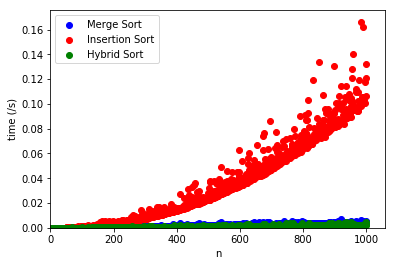

In [18]:
%matplotlib inline
from matplotlib import pyplot as plt

merge_data = plt.scatter(list_sizes, merge_sort_times, c='blue')
insertion_data = plt.scatter(list_sizes, insertion_sort_times, c='red')
hybrid_data = plt.scatter(list_sizes, hybrid_sort_times, c='green')
plt.xlabel('n')
plt.ylabel('time (/s)')
plt.xlim(0)
plt.ylim(0)

plt.legend((merge_data, insertion_data, hybrid_data),
           ('Merge Sort', 'Insertion Sort', 'Hybrid Sort'))

**Now discuss your findings in a few lines in the below cell:**

*Replace with your analysis...*

### 1e. Analyse Merge Sort vs Hybrid Sort

In [19]:
lists = [rand_list(max_len=1000) for _ in range(1000)]

merge_sort_times = [time_f(lambda: merge_sort(x)) for x in lists]
hybrid_sort_times = [time_f(lambda: hybrid_sort(x)) for x in lists]
list_sizes = [len(x) for x in lists]

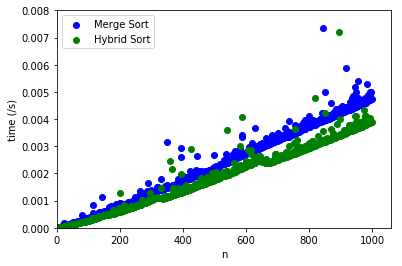

In [22]:
%matplotlib inline
from matplotlib import pyplot as plt

merge_data = plt.scatter(list_sizes, merge_sort_times, c='blue')
hybrid_data = plt.scatter(list_sizes, hybrid_sort_times, c='green')
plt.xlabel('n')
plt.ylabel('time (/s)')
plt.xlim(0)
plt.ylim(0, 0.008)

plt.legend((merge_data, hybrid_data),
           ('Merge Sort', 'Hybrid Sort'))